<h1 style="color:#872325"> Pandas </h1>

In [2]:
import pandas as pd

Pandas tiene dos estructuras principales para trabajar con la información: `pandas.Series` y `pandas.DataFrame`. Los `pandas.Series` es un arreglo matricial con $n$ elementos del mismo tipo, por otro lado, los `pandas.DataFrame` es una colección de $m$ `pandas.Series` no necesariamente del mismo tipo, pero sí con el mismo número $n$ de elementos.

### ¿Cómo crear un Series y un DataFrame desde Python?

In [6]:
# Creando un Series
some_data = [i ** i for i in range(5)]
print(some_data)
pd.Series(some_data)

[1, 1, 4, 27, 256]


0      1
1      1
2      4
3     27
4    256
dtype: int64

In [5]:
# Creando un Series y agregando información sobre los datos a trabajar
some_data = [i ** i for i in range(5)]
pd.Series(some_data, name="x_to_x")

0      1
1      1
2      4
3     27
4    256
Name: x_to_x, dtype: int64

In [4]:
# Creando un Series y agregando información sobre cada índice y el nombre
# de los datos a trabajar
ages = [21, 23, 30, 19, 3]
names = ["John", "Timmy", "Kenny", "Isaac", "Yann"]
pd.Series(ages, index=names, name="people")

John     21
Timmy    23
Kenny    30
Isaac    19
Yann      3
Name: people, dtype: int64

In [8]:
mi_serie = pd.Series(ages, index=names, name="people")
mi_serie

John     21
Timmy    23
Kenny    30
Isaac    19
Yann      3
Name: people, dtype: int64

In [9]:
type(mi_serie.values)

numpy.ndarray

In [7]:
mi_serie.index

Index(['John', 'Timmy', 'Kenny', 'Isaac', 'Yann'], dtype='object')

**¿Cuándo usar un `np.array` y cuando un `pd.Series`?**

Dependiendo de la estrucutura de los datos con los que estémos trabajando se decidirá si usar un numpy array o un pandas' Series. 

**¿Qué propiedades(métodos) contiene un Series?**

In [12]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages = [21, 23, 23, 19, 3]
personas_edades = pd.Series(ages, index=names, name="people")

In [13]:
# Al igual que un numpy array, podemos conocer la dimension de un Series
personas_edades.shape

(5,)

In [14]:
personas_edades.dtype

dtype('int64')

In [15]:
personas_edades.size

5

In [16]:
# A diferencia de los arrays de numpy las Series tienen un 'index'
personas_edades.index

Index(['John', 'Timmy', 'Kenny', 'Yann', 'Isaac'], dtype='object')

In [17]:
# A diferencia de los arrays de numpy las Series tienen un 'name'
personas_edades.name

'people'

In [18]:
personas_edades

John     21
Timmy    23
Kenny    23
Yann     19
Isaac     3
Name: people, dtype: int64

In [19]:
# Acceder nombres
personas_edades["Isaac"]

3

In [20]:
# Modificar valores
personas_edades["Yann"] += 1
personas_edades["Yann"]

20

In [21]:
personas_edades.sort_index()

Isaac     3
John     21
Kenny    23
Timmy    23
Yann     20
Name: people, dtype: int64

In [22]:
# Estadísticos básicos
personas_edades.describe()

count     5.000000
mean     18.000000
std       8.485281
min       3.000000
25%      20.000000
50%      21.000000
75%      23.000000
max      23.000000
Name: people, dtype: float64

In [27]:
# otros estadísticos
print(personas_edades.mean())
print(personas_edades.var())
print(personas_edades.std())
print(personas_edades.skew())
print(personas_edades.kurtosis())

18.0
72.0
8.48528137423857
-2.107407362911296
4.531828703703704


In [24]:
# Tabla de frecuencias
personas_edades.value_counts()

23    2
21    1
20    1
3     1
Name: people, dtype: int64

**Creando un primer Pandas DataFrame**

In [29]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages_list = [21, 23, 23, 19, 3]
colors_list = ["teal", "black", "crimson", "yellow", "white"]
amount_list = [10_000, 100_000, 23_000, 5_000, 11_000]

mi_diccionario = {"ages": ages_list, "colors": colors_list, "bank": amount_list}

personas = pd.DataFrame(mi_diccionario, index=names)
personas.shape

(5, 3)

In [30]:
personas

,ages,colors,bank
John,21,teal,10000
Timmy,23,black,100000
Kenny,23,crimson,23000
Yann,19,yellow,5000
Isaac,3,white,11000


**Accediendo a los elementos del `DataFrame`**

In [31]:
# Tomando una columna como un pd.Series
personas["ages"]

John     21
Timmy    23
Kenny    23
Yann     19
Isaac     3
Name: ages, dtype: int64

In [32]:
personas["colors"]

John        teal
Timmy      black
Kenny    crimson
Yann      yellow
Isaac      white
Name: colors, dtype: object

In [33]:
personas["bank"]

John      10000
Timmy    100000
Kenny     23000
Yann       5000
Isaac     11000
Name: bank, dtype: int64

In [34]:
# Tomando una columna como un pd.Series, tomando una fila como el índice del Series
personas["ages"]["Isaac"]

3

In [35]:
# Existe otra manera de acceder a una columna de un DataFrame
# considerando el nombre de la columna como un atributo
# del DF. Eso aplica si y solo si el nombre no contiene espacios
# o puntos dentro del nombre
personas.ages

John     21
Timmy    23
Kenny    23
Yann     19
Isaac     3
Name: ages, dtype: int64

In [36]:
# Tomando una columna como un pd.DataFrame (subset)
personas[["ages"]]

,ages
John,21
Timmy,23
Kenny,23
Yann,19
Isaac,3


In [38]:
# Tomando una columna como un pd.DataFrame
personas[["ages","bank"]]

,ages,bank
John,21,10000
Timmy,23,100000
Kenny,23,23000
Yann,19,5000
Isaac,3,11000


In [39]:
# Podemos considerar todo menos una columna con el
# método 'drop'. 'axis=1' implica que el vector
# a remover es una columna
personas.drop("colors", axis=1)

,ages,bank
John,21,10000
Timmy,23,100000
Kenny,23,23000
Yann,19,5000
Isaac,3,11000


In [40]:
# Podemos considerar todo menos una fila con el
# método 'drop', 'axis=0' implica que el vector
# a remover es una fila
personas.drop("Timmy", axis=0)

,ages,colors,bank
John,21,teal,10000
Kenny,23,crimson,23000
Yann,19,yellow,5000
Isaac,3,white,11000


**A veces, es necesario conseguir el valor de una fila. En dichas ocasiones, usamos las propiedades `loc` y `iloc`**

`.loc`

In [41]:
# Indice basado en el nombre; no en la posicion
personas.loc["John"]

ages         21
colors     teal
bank      10000
Name: John, dtype: object

In [42]:
# Indice basado en el nombre; no en la posicion
personas.loc["John", "bank"]

10000

In [43]:
# Indice basado en el nombre; no en la posicion
personas.loc["John", ["bank", "colors"]]

bank      10000
colors     teal
Name: John, dtype: object

`.iloc`

In [44]:
# Indice basado en el índice; no en el nombre
personas.iloc[0]

ages         21
colors     teal
bank      10000
Name: John, dtype: object

In [45]:
# Indice basado en el índice; no en el nombre
personas.iloc[0, 1]

'teal'

In [46]:
# Indice basado en el índice; no en el nombre
personas.iloc[0, [1,2]]

colors     teal
bank      10000
Name: John, dtype: object

## Mergers and joins
¿Qué pasa cuando queremos juntar dos DataFrames?

In [47]:
names = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
ages_list = [21, 23, 23, 19, 3]
colors_list = ["teal", "black", "crimson", "yellow", "white"]
amount_list = [10_000, 100_000, 23_000, 5_000, 11_000]

personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list}, index=names)
personas_bank = pd.DataFrame({"bank": amount_list}, index=names)

In [48]:
personas

,ages,colors
John,21,teal
Timmy,23,black
Kenny,23,crimson
Yann,19,yellow
Isaac,3,white


In [49]:
personas_bank

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000
Isaac,11000


**Juntando DataFrames con `join`**

Nota: usamos un `join` en pandas cuando sabemos que ambos `DataFrames` comparten, al menos, un elemento en el índice

In [50]:
personas.join(personas_bank)

,ages,colors,bank
John,21,teal,10000
Timmy,23,black,100000
Kenny,23,crimson,23000
Yann,19,yellow,5000
Isaac,3,white,11000


In [51]:
personas_bank.join(personas)

,bank,ages,colors
John,10000,21,teal
Timmy,100000,23,black
Kenny,23000,23,crimson
Yann,5000,19,yellow
Isaac,11000,3,white


¿Qué pasa cuando no tenemos el mismo número de índices?

In [52]:
personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list}, index=names)
personas_bank = pd.DataFrame({"bank": amount_list[:-1]}, index=names[:-1])

In [53]:
personas_bank

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000


In [54]:
personas

,ages,colors
John,21,teal
Timmy,23,black
Kenny,23,crimson
Yann,19,yellow
Isaac,3,white


In [55]:
# En tal caso, pandas se encarga de llenar los valores vacíos por nosotros
personas.join(personas_bank)

,ages,colors,bank
John,21,teal,10000.0
Timmy,23,black,100000.0
Kenny,23,crimson,23000.0
Yann,19,yellow,5000.0
Isaac,3,white,NaN


In [56]:
personas.join(personas_bank, how='left')

,ages,colors,bank
John,21,teal,10000.0
Timmy,23,black,100000.0
Kenny,23,crimson,23000.0
Yann,19,yellow,5000.0
Isaac,3,white,NaN


In [57]:
personas.join(personas_bank, how='right')

,ages,colors,bank
John,21,teal,10000
Timmy,23,black,100000
Kenny,23,crimson,23000
Yann,19,yellow,5000


In [58]:
personas.join(personas_bank, how='inner')

,ages,colors,bank
John,21,teal,10000
Timmy,23,black,100000
Kenny,23,crimson,23000
Yann,19,yellow,5000


In [59]:
personas.join(personas_bank, how='outer')

,ages,colors,bank
Isaac,3,white,NaN
John,21,teal,10000.0
Kenny,23,crimson,23000.0
Timmy,23,black,100000.0
Yann,19,yellow,5000.0


**Juntando DataFrames con `merge`**

Usamos un `merge` cuando la colúmna de referencia sobre la cuál uniremos no se encuentra en el índice.

In [60]:
personas = pd.DataFrame({"ages": ages_list,
                         "colors": colors_list,
                         "names_person": names})

personas_bank = pd.DataFrame({"bank": amount_list,
                              "person_names": names})

In [61]:
personas

,ages,colors,names_person
0,21,teal,John
1,23,black,Timmy
2,23,crimson,Kenny
3,19,yellow,Yann
4,3,white,Isaac


In [62]:
personas_bank

,bank,person_names
0,10000,John
1,100000,Timmy
2,23000,Kenny
3,5000,Yann
4,11000,Isaac


In [69]:
personas_bank.merge(personas, right_on="names_person", left_on="person_names")

,bank,person_names,ages,colors,names_person
0,10000,John,21,teal,John
1,100000,Timmy,23,black,Timmy
2,23000,Kenny,23,crimson,Kenny
3,5000,Yann,19,yellow,Yann
4,11000,Isaac,3,white,Isaac


### Agregando filas con `append` 

In [64]:
names1 = ["John", "Timmy", "Kenny", "Yann", "Isaac"]
amount_list1 = [10_000, 100_000, 23_000, 5_000, 11_000]

names2 = ["Gerardo", "Luis"]
amount_list2 = [1e6, 10e6]

personas_bank1 = pd.DataFrame({"bank": amount_list1}, index=names1)
personas_bank2 = pd.DataFrame({"bank": amount_list2}, index=names2)

In [65]:
personas_bank1

,bank
John,10000
Timmy,100000
Kenny,23000
Yann,5000
Isaac,11000


In [66]:
personas_bank2

,bank
Gerardo,1000000.0
Luis,10000000.0


In [70]:
personas_bank1.append(personas_bank2)

C:\Users\PatricioGarcia\AppData\Local\Temp\ipykernel_5888\1704565395.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  personas_bank1.append(personas_bank2)


,bank
John,10000.0
Timmy,100000.0
Kenny,23000.0
Yann,5000.0
Isaac,11000.0
Gerardo,1000000.0
Luis,10000000.0


In [72]:
pd.concat([personas_bank1, personas_bank2])

,bank
John,10000.0
Timmy,100000.0
Kenny,23000.0
Yann,5000.0
Isaac,11000.0
Gerardo,1000000.0
Luis,10000000.0


## Pivot Tables and DataFrame manipulations 

In [74]:
!pip install pydataset

  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=aeccd755a1c25f52c5984c4dccdce5d07c2d2450824a60fe9a278ebda84afeae
  Stored in directory: c:\users\patriciogarcia\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [75]:
from pydataset import data
import matplotlib.pyplot as plt

initiated datasets repo at: C:\Users\PatricioGarcia\.pydataset/


In [77]:
iris = data("iris")
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [79]:
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [80]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [81]:
iris.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [83]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

<AxesSubplot: >

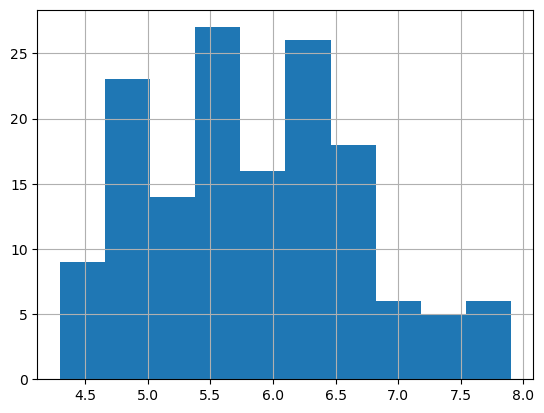

In [85]:
iris["Sepal.Length"].hist()

<AxesSubplot: xlabel='Petal.Length', ylabel='Petal.Width'>

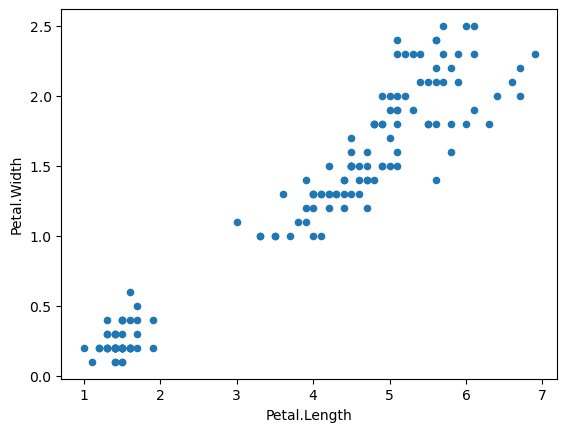

In [86]:
iris.plot.scatter(x='Petal.Length', y='Petal.Width')

<AxesSubplot: >

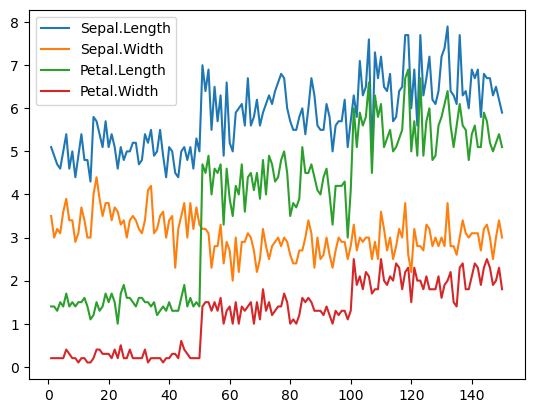

In [87]:
iris.plot()

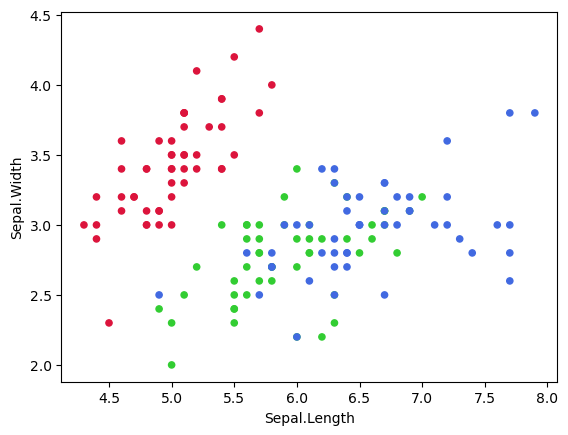

In [88]:
color_map = {"setosa": "crimson",
             "virginica": "royalblue",
             "versicolor": "limegreen"}
colors = [color_map[c] for c in iris.Species]
iris.plot(x="Sepal.Length", y="Sepal.Width", kind="scatter", c=colors)
plt.show()

In [94]:
!pip install seaborn

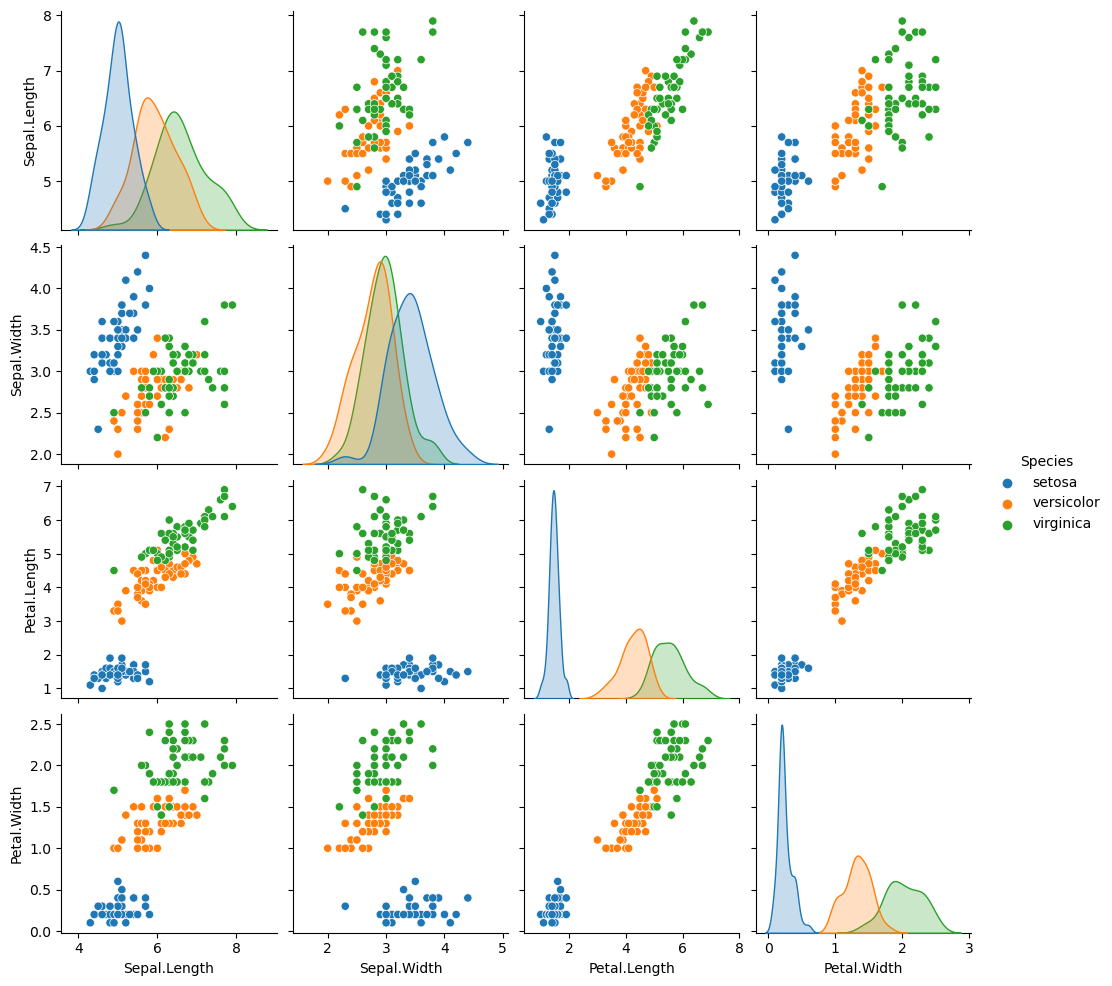

In [95]:
import seaborn as sns
sns.pairplot(iris, hue="Species")
plt.show()

**Creando nuevos features (propiedades) sobre la información**

Para la base de datos `iris`, conocemos el largo y el ancho tanto del tallo tanto del pétalo como del tallo. Crearemos entonces una nueva columna con el área de cada una de estas partes

In [96]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [97]:
iris["Sepal.Length"] * iris["Sepal.Width"]

1      17.85
2      14.70
3      15.04
4      14.26
5      18.00
6      21.06
7      15.64
8      17.00
9      12.76
10     15.19
11     19.98
12     16.32
13     14.40
14     12.90
15     23.20
16     25.08
17     21.06
18     17.85
19     21.66
20     19.38
21     18.36
22     18.87
23     16.56
24     16.83
25     16.32
26     15.00
27     17.00
28     18.20
29     17.68
30     15.04
31     14.88
32     18.36
33     21.32
34     23.10
35     15.19
36     16.00
37     19.25
38     17.64
39     13.20
40     17.34
41     17.50
42     10.35
43     14.08
44     17.50
45     19.38
46     14.40
47     19.38
48     14.72
49     19.61
50     16.50
51     22.40
52     20.48
53     21.39
54     12.65
55     18.20
56     15.96
57     20.79
58     11.76
59     19.14
60     14.04
61     10.00
62     17.70
63     13.20
64     17.69
65     16.24
66     20.77
67     16.80
68     15.66
69     13.64
70     14.00
71     18.88
72     17.08
73     15.75
74     17.08
75     18.56
76     19.80
77     19.04

In [98]:
iris["Sepal.Area"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["Petal.Area"] = iris["Petal.Length"] * iris["Petal.Width"]
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Sepal.Area,Petal.Area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28


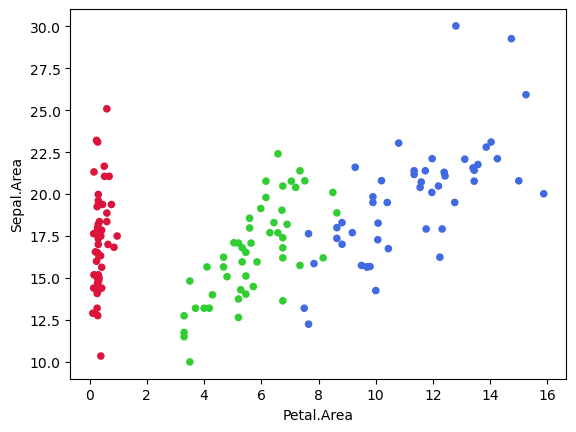

In [99]:
color_map = {"setosa": "crimson",
             "virginica": "royalblue",
             "versicolor": "limegreen"}
colors = [color_map[c] for c in iris.Species]
iris.plot(x="Petal.Area", y="Sepal.Area", kind="scatter", c=colors)
plt.show()

¿Cómo resumir los datos que tenemos?

Tablas dinámicas

In [100]:
iris.pivot_table(index="Species", aggfunc="mean")

,Petal.Area,Petal.Length,Petal.Width,Sepal.Area,Sepal.Length,Sepal.Width
Species,,,,,,
setosa,0.3656,1.462,0.246,17.2578,5.006,3.428
versicolor,5.7204,4.260,1.326,16.5262,5.936,2.770
virginica,11.2962,5.552,2.026,19.6846,6.588,2.974


---------
### Un segundo ejemplo

In [101]:
cars = data("mtcars")

In [102]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [103]:
cars.pivot_table(index="cyl", columns="am", values=["hp", "mpg"])

hp                 mpg           
am            0           1       0          1
cyl                                           
4     84.666667   81.875000  22.900  28.075000
6    115.250000  131.666667  19.125  20.566667
8    194.166667  299.500000  15.050  15.400000

## Queries

In [104]:
titanic = data("Titanic")
titanic.head()

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0


**Haciendo `maps` para acceder filtrar columnas**

In [106]:
titanic["Class"]

1      1st
2      2nd
3      3rd
4     Crew
5      1st
6      2nd
7      3rd
8     Crew
9      1st
10     2nd
11     3rd
12    Crew
13     1st
14     2nd
15     3rd
16    Crew
17     1st
18     2nd
19     3rd
20    Crew
21     1st
22     2nd
23     3rd
24    Crew
25     1st
26     2nd
27     3rd
28    Crew
29     1st
30     2nd
31     3rd
32    Crew
Name: Class, dtype: object

In [105]:
titanic["Class"] == "1st"

1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21     True
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29     True
30    False
31    False
32    False
Name: Class, dtype: bool

In [107]:
titanic[titanic["Class"] == "1st"]

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
5,1st,Female,Child,No,0
9,1st,Male,Adult,No,118
13,1st,Female,Adult,No,4
17,1st,Male,Child,Yes,5
21,1st,Female,Child,Yes,1
25,1st,Male,Adult,Yes,57
29,1st,Female,Adult,Yes,140


In [108]:
titanic[titanic["Survived"] == "Yes"]

,Class,Sex,Age,Survived,Freq
17,1st,Male,Child,Yes,5
18,2nd,Male,Child,Yes,11
19,3rd,Male,Child,Yes,13
20,Crew,Male,Child,Yes,0
21,1st,Female,Child,Yes,1
22,2nd,Female,Child,Yes,13
23,3rd,Female,Child,Yes,14
24,Crew,Female,Child,Yes,0
25,1st,Male,Adult,Yes,57
26,2nd,Male,Adult,Yes,14


In [111]:
# Podemos aplicar varias condiciones para seleccionar los datos
titanic.loc[(titanic["Survived"] == "Yes") & (titanic["Class"] == "1st")]

,Class,Sex,Age,Survived,Freq
17,1st,Male,Child,Yes,5
21,1st,Female,Child,Yes,1
25,1st,Male,Adult,Yes,57
29,1st,Female,Adult,Yes,140


In [112]:
# Podemos aplicar varias condiciones para seleccionar los datos
titanic.loc[(titanic["Survived"] == "Yes") | (titanic["Class"] == "1st")]

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
5,1st,Female,Child,No,0
9,1st,Male,Adult,No,118
13,1st,Female,Adult,No,4
17,1st,Male,Child,Yes,5
18,2nd,Male,Child,Yes,11
19,3rd,Male,Child,Yes,13
20,Crew,Male,Child,Yes,0
21,1st,Female,Child,Yes,1
22,2nd,Female,Child,Yes,13


**Usando `.query` podemos realizar esta misma operación**

In [113]:
titanic.query("Class == '1st'")

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
5,1st,Female,Child,No,0
9,1st,Male,Adult,No,118
13,1st,Female,Adult,No,4
17,1st,Male,Child,Yes,5
21,1st,Female,Child,Yes,1
25,1st,Male,Adult,Yes,57
29,1st,Female,Adult,Yes,140


In [114]:
titanic.query("Survived == 'Yes'")

,Class,Sex,Age,Survived,Freq
17,1st,Male,Child,Yes,5
18,2nd,Male,Child,Yes,11
19,3rd,Male,Child,Yes,13
20,Crew,Male,Child,Yes,0
21,1st,Female,Child,Yes,1
22,2nd,Female,Child,Yes,13
23,3rd,Female,Child,Yes,14
24,Crew,Female,Child,Yes,0
25,1st,Male,Adult,Yes,57
26,2nd,Male,Adult,Yes,14


## Exportando información

In [115]:
irispv = iris.pivot_table(index="Species", aggfunc="mean")
irispv

,Petal.Area,Petal.Length,Petal.Width,Sepal.Area,Sepal.Length,Sepal.Width
Species,,,,,,
setosa,0.3656,1.462,0.246,17.2578,5.006,3.428
versicolor,5.7204,4.260,1.326,16.5262,5.936,2.770
virginica,11.2962,5.552,2.026,19.6846,6.588,2.974


In [ ]:
#irispv.to_sql("iris_td.csv")

In [116]:
irispv.to_csv("iris_td.csv")

In [117]:
irispv.to_clipboard()

Species	Petal.Area	Petal.Length	Petal.Width	Sepal.Area	Sepal.Length	Sepal.Width
setosa	0.36560000000000004	1.462	0.24600000000000002	17.2578	5.006	3.428
versicolor	5.7204	4.26	1.3259999999999998	16.5262	5.936	2.77
virginica	11.296199999999999	5.5520000000000005	2.026	19.6846	6.587999999999999	2.9739999999999998


In [119]:
!pip install openpyxl

In [120]:
irispv.to_excel("iris_td.xlsx", sheet_name="tabla_din")